Here we consider a two dimensional system with a limit cycle, and we will create a stochastic bridge between two points on the limit cycle, i.e. we will impose a terminal constraint onto the dynamics.

For sanity check we simulate a long trajectory of the uncontrolled system stored in F.
We create an instance of DPFC with proper attributes (i.e. initial and terminal state and time, drift and diffusion of the uncontrolled process).

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from DeterministicParticleFlowControl import DPFC

### ploting parameters
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
plt.rcParams["axes.edgecolor"] = "1.0"
plt.rcParams["axes.linewidth"]  = 2  


%matplotlib inline        
        
        
        
        

    

#def f(x,mu=1):#Van der Pol oscillator
#  x0 = mu*(x[0] - (1/3)*x[0]**3-x[1])
#  x1 = (1/mu)*x[0]
#  return np.array([x0,x1])

###Limit cycle function and analytic gradient for passing for comparison calculations
def f(x,t=0):#LC
    x0 = -x[1] + x[0]*(1-x[0]**2 -x[1]**2)
    x1 = x[0] + x[1]*(1-x[0]**2 -x[1]**2)
    return np.array([x0,x1])

def glnfss(x,sigma):
    x0 = - x[0]*(x[0]**2 + x[1]**2 - 1)/(0.5*sigma**2)
    x1 = - x[1]*(x[0]**2 + x[1]**2 - 1)/(0.5*sigma**2)
    return np.array([x0,x1])


#simulation_precision
dt = 0.001

t_start = 0.
T = 500.
#x0 = np.array([1.81, -1.41])
x_0 = np.array([-0., -1.0])

timegridall = np.arange(0,T,dt)
F = np.zeros((2,timegridall.size))
#noise amplitude
g = 0.1    
for ti,t in enumerate(timegridall):
    if ti==0:
        F[:,0] = x_0
    else:
        F[:,ti] = F[:,ti-1]+ dt* f(F[:,ti-1])+(g)*np.random.normal(loc=0.0, scale=np.sqrt(dt), size=(2,))  

steps = 4000 #steps between initial and terminal points
obs_dens = steps
N = 200
M = 40
t1 = timegridall[100]
t2 = timegridall[100+steps]
y1 = F[:,100]
y2 = F[:,100+steps]
    
    
##create object bridg2d that contains the simulated flows
bridg2d = DPFC(t1,t2,y1,y2,f,g,N,M,dens_est='nonparametric', deterministic=True)


plt.figure(figsize=(10,10)),
plt.plot(F[0],F[1],'.');
plt.plot(bridg2d.B[0].T,bridg2d.B[1].T,alpha=0.5,c='grey');
plt.plot(y1[0],y1[1],'g.',markersize=16);
plt.plot(y2[0],y2[1],'x',c='silver',markersize=16);
plt.title('Invariant density of the limit cycle and backward flow');
#plt.savefig('bridge_with_correct_drift.png')
#plt.figure(),plt.plot(bridg2d.B[0].T,alpha=0.3)
    
    
    
            

Text(0.5, 0.98, 'Zoomed in each dimension seperately')

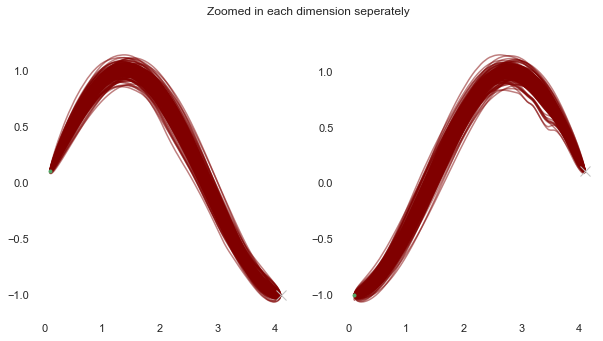

In [12]:
plt.figure(figsize=(10,5)),
plt.subplot(1,2,1)
plt.plot(bridg2d.timegrid,bridg2d.B[0,:,:].T,'maroon',alpha=0.5)
plt.plot(bridg2d.timegrid[-1],y2[0],'x', c='silver',markersize=10)
plt.plot(bridg2d.timegrid[0],y1[0],'.g')
#plt.ylim(-2,2)

plt.subplot(1,2,2)
plt.plot(bridg2d.timegrid,bridg2d.B[1].T,'maroon',alpha=0.5)
plt.plot(bridg2d.timegrid[-1],y2[1],'x', c='silver',markersize=10)
plt.plot(bridg2d.timegrid[0],y1[1],'.g')
plt.suptitle('Zoomed in each dimension seperately')

Create control trajectories from the computed flows.